In [21]:
import numpy as np
import pandas as pd
import sys

try:
    if path:
        raise Exception('changed')
except:
    path = True
    sys.path.append('../')

from src.dataset import Animals
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
data_path = Path("../data")

animal_dataset = Animals(data_path.joinpath("zoo.csv"), data_path.joinpath("zoo_target.csv"), n_iter=100, eps=1e-1, silent=False, seed=475)

In [23]:
print(f"Number of samples: {animal_dataset.X.shape[0]}")
print(f"Number of clusters: {animal_dataset.n_clusters}")
print(f"Number of features: {animal_dataset.X.shape[1]}")
print(f"Number of unique values per feature: {animal_dataset.m}")

Number of samples: 101
Number of clusters: 7
Number of features: 15
Number of unique values per feature: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


### Gaussian Mixtures

In [24]:
animal_dataset.cluster_gaussian()

Clustered data into 7 clusters
Estimated means: [[1.         1.         1.92857143 1.         1.         2.
  1.71428571 2.         2.         1.         1.14285714 1.92857143
  2.         1.07142857 1.28571429]
 [2.         1.         1.         2.         1.10526316 1.
  1.         2.         2.         2.         1.         1.
  1.89473684 1.31578947 1.63157895]
 [1.         2.         2.         1.         1.8        1.3
  1.45       1.         2.         2.         1.         1.
  2.         1.15       1.3       ]
 [1.         1.         1.88888889 1.         1.         1.44444444
  1.77777778 1.77777778 1.88888889 2.         1.33333333 1.
  1.66666667 1.         1.11111111]
 [1.         1.         2.         1.         1.         1.85714286
  2.         1.         1.         1.         1.14285714 1.
  1.         1.         1.14285714]
 [1.4        1.         2.         1.         1.6        1.
  1.1        1.         1.         2.         1.2        1.
  1.         1.1        1. 

array([7, 2, 1, 7, 7, 2, 2, 1, 1, 2, 7, 3, 1, 5, 5, 5, 3, 2, 1, 7, 3, 3,
       2, 3, 6, 4, 4, 2, 2, 7, 6, 2, 2, 3, 1, 2, 2, 3, 1, 6, 6, 3, 6, 3,
       7, 7, 5, 7, 7, 7, 7, 6, 4, 5, 7, 2, 3, 3, 3, 3, 1, 1, 4, 7, 7, 2,
       7, 7, 7, 7, 2, 3, 4, 1, 7, 7, 1, 5, 3, 3, 4, 6, 1, 3, 2, 5, 1, 3,
       6, 4, 4, 4, 1, 2, 2, 3, 2, 6, 7, 6, 3])

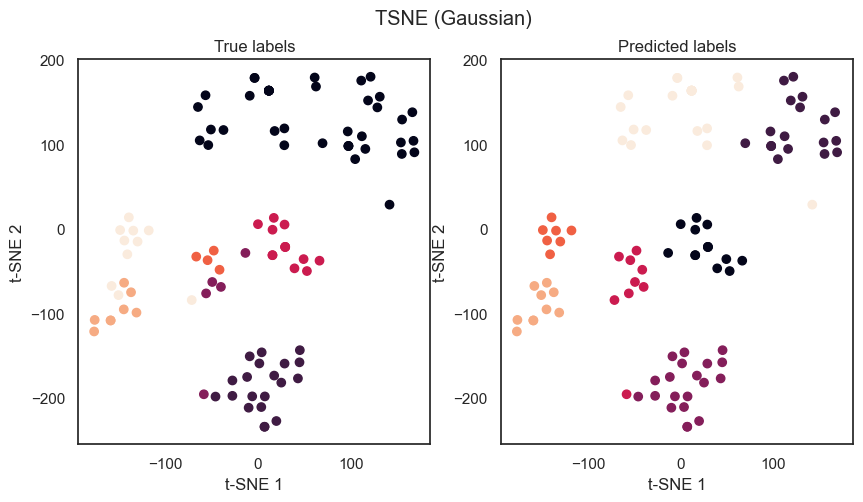

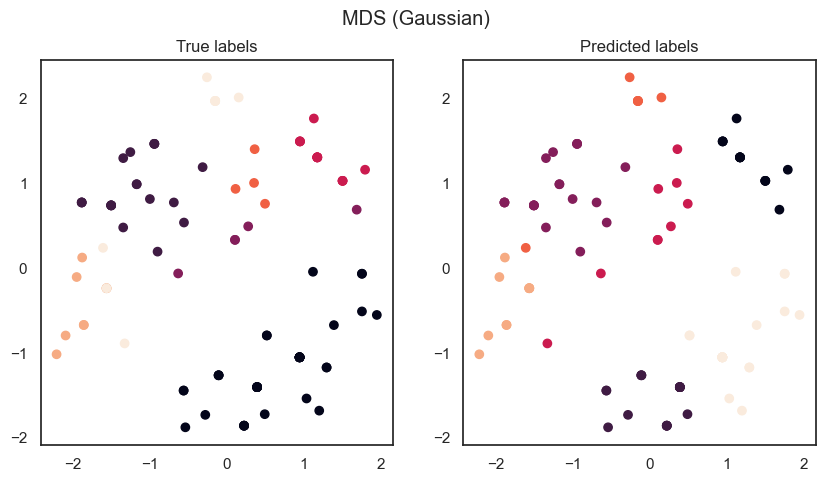

In [25]:
animal_dataset.plot_tsne()
animal_dataset.plot_mds()

              precision    recall  f1-score   support

         1.0       1.00      0.54      0.70        41
         2.0       1.00      1.00      1.00        20
         3.0       0.44      0.80      0.57         5
         4.0       0.93      1.00      0.96        13
         5.0       0.00      0.00      0.00         4
         6.0       0.80      1.00      0.89         8
         7.0       1.00      0.70      0.82        10

    accuracy                           0.73       101
   macro avg       0.74      0.72      0.71       101
weighted avg       0.91      0.73      0.79       101



(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2b7b11fd0>,
 {'1.0': {'precision': 1.0,
   'recall': 0.5365853658536586,
   'f1-score': 0.6984126984126985,
   'support': 41.0},
  '2.0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 20.0},
  '3.0': {'precision': 0.4444444444444444,
   'recall': 0.8,
   'f1-score': 0.5714285714285714,
   'support': 5.0},
  '4.0': {'precision': 0.9285714285714286,
   'recall': 1.0,
   'f1-score': 0.962962962962963,
   'support': 13.0},
  '5.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4.0},
  '6.0': {'precision': 0.8,
   'recall': 1.0,
   'f1-score': 0.888888888888889,
   'support': 8.0},
  '7.0': {'precision': 1.0,
   'recall': 0.7,
   'f1-score': 0.8235294117647058,
   'support': 10.0},
  'accuracy': 0.7326732673267327,
  'macro avg': {'precision': 0.7390022675736961,
   'recall': 0.7195121951219513,
   'f1-score': 0.7064603619225468,
   'support': 101.0},
  'weighted avg': {'precision': 0.907857

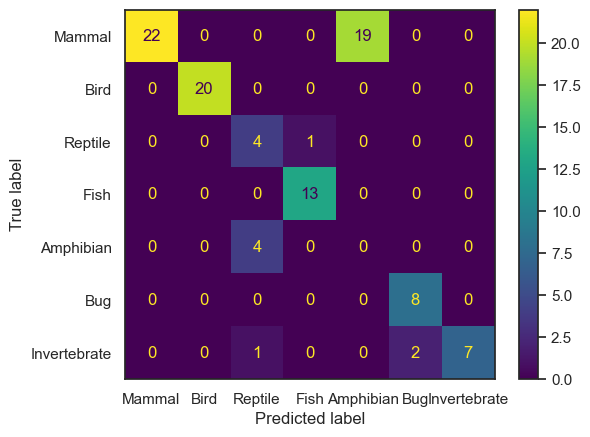

In [26]:
animal_dataset.classification_results(runtype="Gaussian")

### K-Means

Clustered data into 7 clusters
Estimated means: [[1.90909091 1.         1.04545455 2.         1.         1.27272727
  2.         1.95454545 2.         2.         1.         1.18181818
  1.81818182 1.09090909 1.90909091]
 [1.         1.95238095 2.         1.         1.76190476 1.28571429
  1.42857143 1.         2.         2.         1.         1.
  2.         1.14285714 1.33333333]
 [1.4        1.         2.         1.         1.6        1.
  1.1        1.         1.         2.         1.2        1.
  1.         1.1        1.        ]
 [1.         1.         2.         1.         1.         2.
  1.69230769 2.         2.         1.         1.07692308 2.
  2.         1.07692308 1.30769231]
 [2.         1.         1.         2.         1.10526316 1.
  1.         2.         2.         2.         1.         1.
  1.89473684 1.31578947 1.63157895]
 [1.         1.         1.77777778 1.         1.         1.55555556
  1.88888889 1.88888889 1.88888889 1.88888889 1.44444444 1.
  1.66666667 1.     

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2b7317010>,
 {'1.0': {'precision': 1.0,
   'recall': 0.5365853658536586,
   'f1-score': 0.6984126984126985,
   'support': 41.0},
  '2.0': {'precision': 0.9523809523809523,
   'recall': 1.0,
   'f1-score': 0.975609756097561,
   'support': 20.0},
  '3.0': {'precision': 0.4444444444444444,
   'recall': 0.8,
   'f1-score': 0.5714285714285714,
   'support': 5.0},
  '4.0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 13.0},
  '5.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4.0},
  '6.0': {'precision': 0.8,
   'recall': 1.0,
   'f1-score': 0.888888888888889,
   'support': 8.0},
  '7.0': {'precision': 1.0,
   'recall': 0.7,
   'f1-score': 0.8235294117647058,
   'support': 10.0},
  'accuracy': 0.7326732673267327,
  'macro avg': {'precision': 0.7424036281179138,
   'recall': 0.7195121951219513,
   'f1-score': 0.7082670466560608,
   'support': 101.0},
  'weighted avg': {'precision': 0.907622

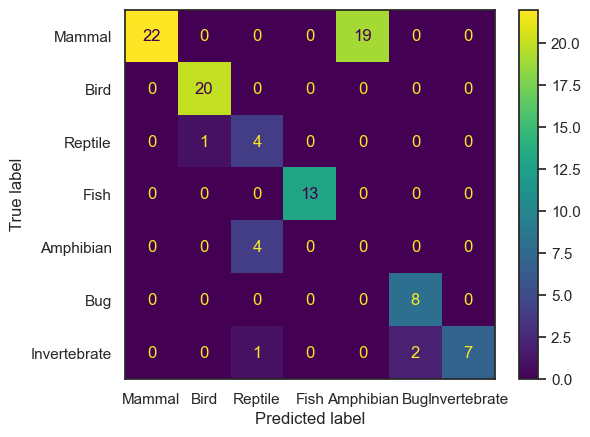

In [27]:
animal_dataset.cluster_kmeans()
animal_dataset.classification_results(runtype="K-Means")

### With BOS Model

In [28]:
animal_dataset.cluster_bos(animal_dataset.n_clusters)

Iteration 0
--------------------
Current mu: [[2 1 2 2 1 1 1 2 2 1 2 2 2 2 1]
 [2 2 2 1 1 2 2 1 1 1 2 1 1 2 1]
 [1 1 1 1 1 2 1 2 1 2 2 1 2 1 2]
 [1 1 1 1 1 1 1 1 1 2 2 2 2 1 2]
 [1 2 1 1 2 1 1 2 1 1 2 2 2 1 1]
 [1 1 2 2 2 1 2 2 1 2 2 1 2 1 2]
 [2 1 2 1 2 1 2 2 1 2 2 1 2 2 1]]
Current pi: [[0.17227822 0.36835151 0.00962955 0.47756587 0.50654693 0.55165144
  0.18791012 0.93630196 0.98021473 0.81549705 0.10576302 0.23512853
  0.77695279 0.20836088 0.84493564]
 [0.45391004 0.71686205 0.54739478 0.61224276 0.90334394 0.85710142
  0.46268628 0.50104157 0.82040535 0.57497848 0.28009907 0.98077873
  0.02576924 0.78203228 0.44204288]
 [0.58314166 0.09126352 0.828492   0.68433301 0.696771   0.17712007
  0.53733399 0.2584942  0.2390341  0.88072879 0.68456649 0.4218038
  0.73236169 0.92893243 0.55340199]
 [0.19127898 0.11128645 0.80661663 0.34317019 0.08195385 0.97212169
  0.65872327 0.39597634 0.13190538 0.57780992 0.73030761 0.60025419
  0.63982565 0.49900821 0.7241669 ]
 [0.05939831 0.96689858 

array([4, 4, 1, 4, 4, 4, 4, 1, 1, 4, 4, 5, 1, 2, 2, 2, 3, 4, 1, 6, 5, 3,
       4, 3, 7, 1, 1, 4, 4, 4, 7, 4, 4, 3, 1, 4, 4, 3, 1, 7, 7, 3, 7, 5,
       4, 4, 2, 4, 6, 4, 4, 7, 1, 2, 4, 4, 3, 5, 3, 5, 1, 1, 1, 3, 4, 4,
       6, 4, 4, 4, 4, 3, 3, 1, 6, 6, 1, 2, 3, 3, 1, 7, 1, 5, 4, 2, 1, 3,
       7, 1, 3, 1, 1, 4, 4, 3, 4, 7, 4, 7, 5])

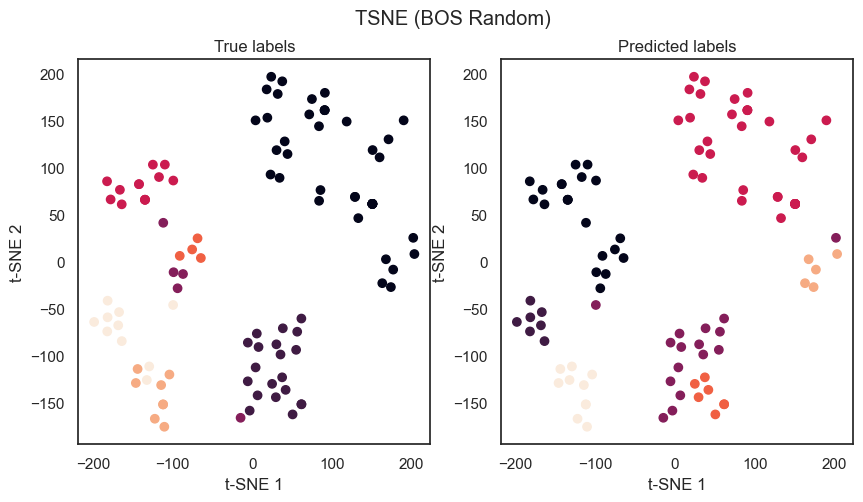

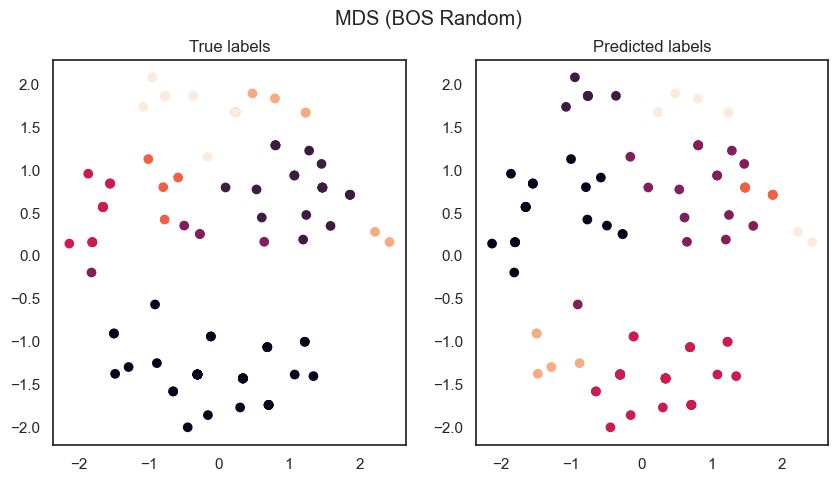

In [34]:
animal_dataset.plot_tsne(runtype="BOS Random")
animal_dataset.plot_mds(runtype="BOS Random")


Text(0.5, 1.0, 'Optimal transport')

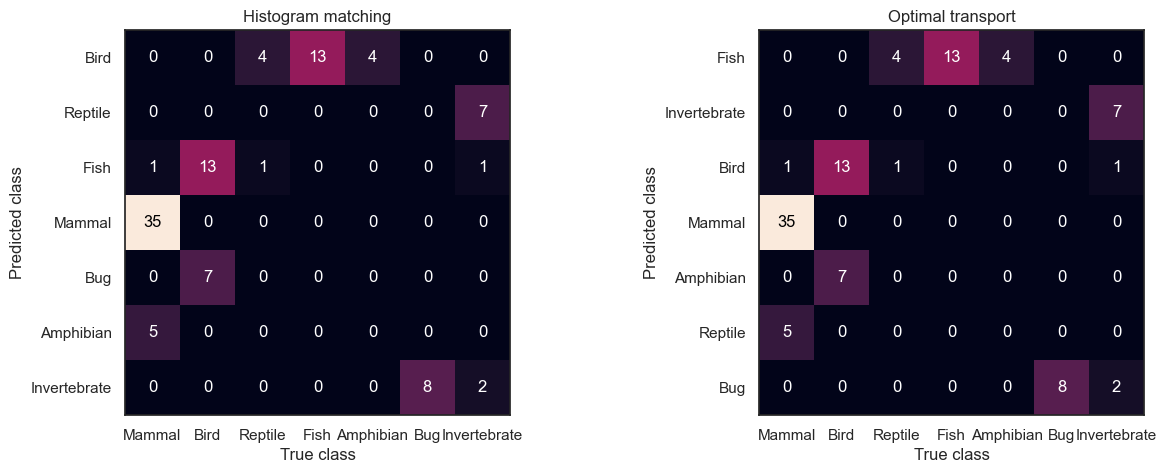

In [30]:
# Assign clusters using histogram matching (ranking)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

hist_pred = np.sum(animal_dataset.clusters == np.arange(1, 1 + animal_dataset.n_clusters).reshape(-1, 1), axis=1)
hist_true = np.sum(animal_dataset.y == np.arange(1, 1 + animal_dataset.n_clusters).reshape(-1, 1), axis=1)

hist_pred_sorted = np.argsort(hist_pred)
hist_true_sorted = np.argsort(hist_true)

pred_labels = {hist_pred_sorted[i] + 1: animal_dataset.target_decoder[hist_true_sorted[i] + 1] for i in range(animal_dataset.n_clusters)}

ax[0] = animal_dataset.plot_assignment_matrix(pred_labels=pred_labels, target_decoder=animal_dataset.target_decoder, ax=ax[0])
ax[0].set_title("Histogram matching")

# Finding the correct clusters with optimal transport by default

ax[1] = animal_dataset.plot_assignment_matrix(ax=ax[1])
ax[1].set_title("Optimal transport")

Optimal transport allows to get a better assignment of the different clusters because it takes into account the cost matrix against just matching the histograms by sorting them.

Note that sorting the historgrams is not necessarily the best way to assign the labels for the newly clustered data. This is because sometimes, two wrongly assigned observations can flip the order of the histograms and lead to a bad label assignment. This is why we use optimal transport to get a better assignment of the different clusters.

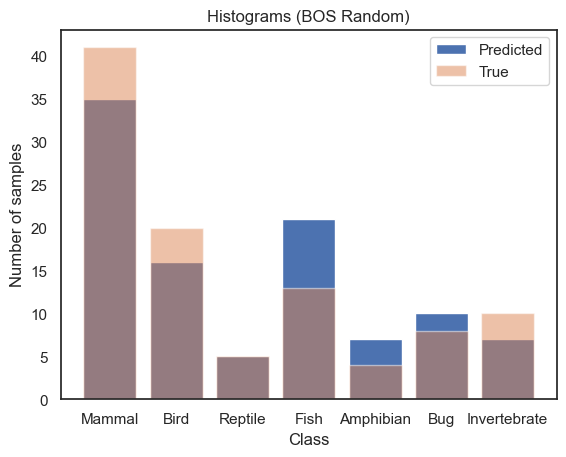

In [31]:
animal_dataset.plot_histograms()

              precision    recall  f1-score   support

         1.0       1.00      0.85      0.92        41
         2.0       0.81      0.65      0.72        20
         3.0       0.00      0.00      0.00         5
         4.0       0.62      1.00      0.76        13
         5.0       0.00      0.00      0.00         4
         6.0       0.80      1.00      0.89         8
         7.0       1.00      0.70      0.82        10

    accuracy                           0.75       101
   macro avg       0.60      0.60      0.59       101
weighted avg       0.81      0.75      0.77       101



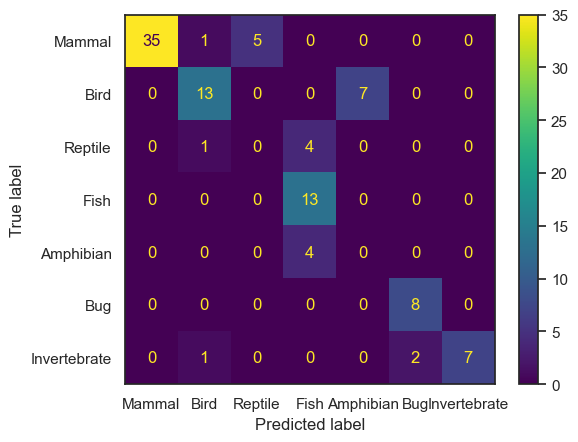

In [32]:
disp, cr = animal_dataset.classification_results()

In [33]:
from tqdm import tqdm
from collections import defaultdict
from sklearn.metrics import adjusted_rand_score
from scipy.stats import wasserstein_distance

n_exp = 10
scores = defaultdict(list)

for i in tqdm(range(n_exp)):
    print(f"Experiment {i+1}")
    print("-"*20)
    animal_dataset.silent = True
    animal_dataset.seed = i
    clusters = animal_dataset.cluster_bos()
    disp, cr = animal_dataset.classification_results()

    scores["f1"].append(cr["weighted avg"]["f1-score"])
    scores["precision"].append(cr["weighted avg"]["precision"])
    scores["recall"].append(cr["weighted avg"]["recall"])
    scores["wasserstein_distance"].append(wasserstein_distance(clusters, y))
    scores["adjusted_rand_score"].append(adjusted_rand_score(clusters, y))

    print(f"f1-score: {scores['f1'][-1]}")
    print("-"*20)

print(f"f1-score: {np.mean(scores['f1'])} +- {np.std(scores['f1'])} (std)")
print(f"precision: {np.mean(scores['precision'])} +- {np.std(scores['precision'])} (std)")
print(f"recall: {np.mean(scores['recall'])} +- {np.std(scores['recall'])} (std)")
print(f"wasserstein_distance: {np.mean(scores['wasserstein_distance'])} +- {np.std(scores['wasserstein_distance'])} (std)")


  0%|          | 0/10 [00:00<?, ?it/s]

Experiment 1
--------------------


  0%|          | 0/10 [00:23<?, ?it/s]


KeyboardInterrupt: 